<a href="https://colab.research.google.com/github/vilandao/Deep_learning/blob/master/Flower_Recognition_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Flower regconition using CNN**
-----------------------------------------

### About the dataset:
This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.

The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.

For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are also not reduced to a single size, they have different proportions.

The purpose of this kernel is to develop a machine learning model to classify flowers using Convolutional Neural Network(CNN).

### About the kernel.
In order to achieve our goal, the kernel below will be divided into different sections:

1. Unzip data file and import Python working libraries

2. Data pre-processing: prepare images and data directories for modeling

3. Build CNN model to classify flower images

4. Evaluate model and conclusion

Now let's get started!

-------------------------------------------------

##### **1. Unzip data file and import working libraries:**



In [ ]:
# Since we are using neural network, we want to take advantage of GPU for parallelism to speed up execution time.
# Check to make sure GPU is used
%tensorflow_version 2.x
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# Print out device details:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18168132085328363524, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13534162257432406059
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15683967080341117581
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12336357512475559305
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

Now that GPU has been activated, let's unzip and take a look at our data.

In [ ]:
# Unzip data file:
# from zipfile import ZipFile
# filename = '/content/drive/My Drive/Thinkful Data Science Flex/8782_44566_bundle_archive.zip'

# with ZipFile(filename, 'r') as zip:
  # zip.extractall()
  # print('Done')

In [ ]:
# Import libraries
# Linear algebra and data maninulation libraries:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np 
import random 
from random import shuffle  

# Visualization libraries:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# Machine learning with sklearn:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Neural network with Tensorflow and Keras:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# System:
import cv2
from tqdm import tqdm
import os
from PIL import Image

Using TensorFlow backend.


In [ ]:
print('Flower folders include {}'.format(os.listdir('/content/drive/My Drive/Thinkful Data Science Flex/flowers')))

Flower folders include ['dandelion', 'daisy', 'sunflower', 'rose', 'tulip']


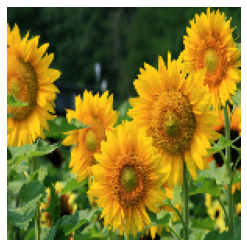

In [ ]:
# plotting a random image from 'sunflower' folder:
img = plt.imread("/content/drive/My Drive/Thinkful Data Science Flex/flowers/sunflower/1008566138_6927679c8a.jpg")
img = cv2.resize(img,(150,150)) 
plt.imshow(img)
plt.axis("off")
plt.show()

#### **2. Data pre-processing: prepare images and data directories for modeling**

In [ ]:
# Create a list that houses all images and a list that houses all image labels:
x =[] # list for images
y =[] # list for label
IMG_SIZE=150 # set image size = 150 pixels

FLOWER_DAISY_DIR='/content/drive/My Drive/Thinkful Data Science Flex/flowers/daisy'
FLOWER_DANDI_DIR='/content/drive/My Drive/Thinkful Data Science Flex/flowers/dandelion'
FLOWER_ROSE_DIR='/content/drive/My Drive/Thinkful Data Science Flex/flowers/rose'
FLOWER_SUNFLOWER_DIR='/content/drive/My Drive/Thinkful Data Science Flex/flowers/sunflower'
FLOWER_TULIP_DIR='/content/drive/My Drive/Thinkful Data Science Flex/flowers/tulip'

In [ ]:
# Helper function that return flower label:
def assign_label(img,flower_type):
    return flower_type

In [ ]:
# Helper functio to create image directory:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
      try:
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = plt.imread(path)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        x.append(np.array(img)) # append images to list of images
        y.append(str(label)) # append labels to list of labels
      except:
        None

In [ ]:
# Process daisy images:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(x))

100%|██████████| 769/769 [00:02<00:00, 310.40it/s]

769


In [ ]:
# Process sunflower images:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(x))

100%|██████████| 734/734 [00:02<00:00, 263.44it/s]

1503


In [ ]:
# Process tulip images:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(x))

100%|██████████| 984/984 [00:03<00:00, 290.07it/s]

2487


In [ ]:
# Process rose images:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(x))

100%|██████████| 784/784 [00:02<00:00, 305.43it/s]

3271


In [ ]:
# Process dandelion images:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(x))

100%|██████████| 1055/1055 [00:03<00:00, 290.29it/s]

4323


In [ ]:
print('Our dataset has {} images'.format(len(x)))

Our dataset has 4323 images


In [ ]:
print('Our dataset has {} labels'.format(len(y)))

Our dataset has 4323 labels


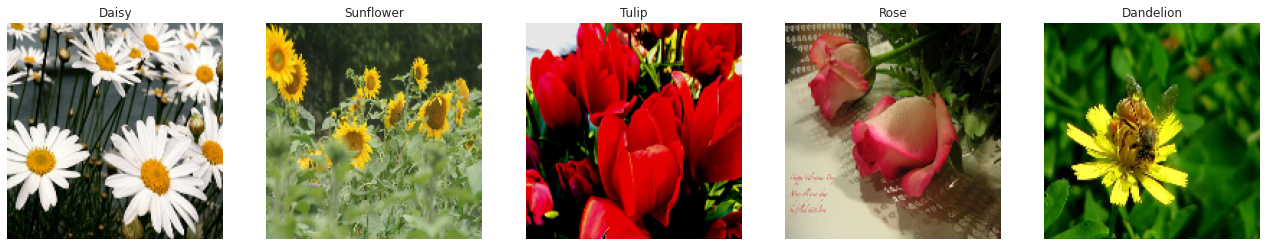

In [ ]:
#plot one of each flower type in our dataset:
plt.figure(figsize = (20,20))
for i in range(5):
    img = x[1000*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y[1000*i])

In [ ]:
# Set random seeds to assure code reproduciable:
np.random.seed(42)
random.seed(42)
tf.compat.v1.set_random_seed(42)

In [ ]:
# Convert target variable to categorcal variable:
le= LabelEncoder()
y =le.fit_transform(y)

y =to_categorical(y,5)
x = np.array(x)

In [ ]:
# Split the dataset into train and test set:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)
x_train = x_train/255 # normalize values to 1 from 0 to 255 (256 values of pixels)
x_test = x_test/255 # normalize values to 1 from 0 to 255 (256 values of pixels)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# Check on the shape of train and test data:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3458, 150, 150, 3) (3458, 5)
(865, 150, 150, 3) (865, 5)


The next step in data pre-processing that we will perform is image augmentation.

Deep neural networks need a large amount of training data to achieve good performance. To build a powerful image classifier using very little training data (our image dataset only has 4323 images, which is quite small), image augmentation is usually required to boost the performance of deep networks. Image augmentation artificially creates training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear and flips, etc.

In this kernel, we'll use ImageDataGenerator class from Keras to perform image augmentation. There's other libraries out there (imgaug, Augmentor, albumentations, etc.) that can be also be applied for the same purpose.

In [ ]:
# Image augmentation:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(x_train)

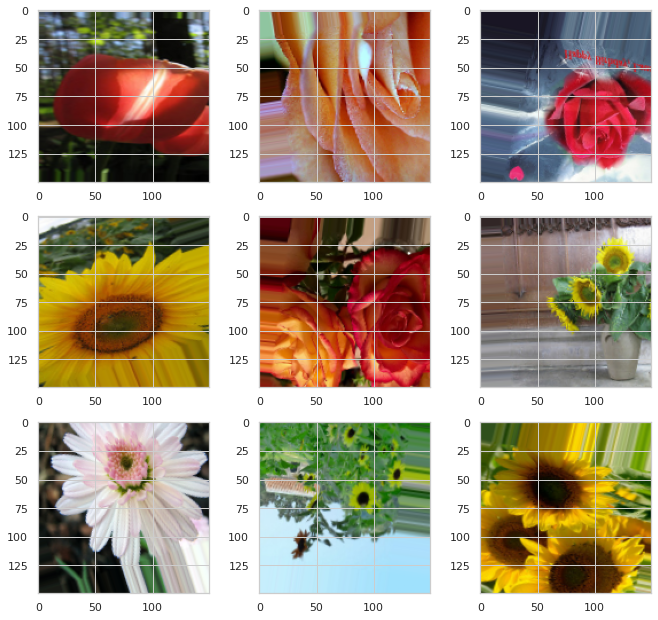

In [ ]:
# Show examples of augmented data:
plt.figure(figsize = (10,10))
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(x_batch[i], cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

#### **3: Build CNN neural network to classify flower types:**

In [ ]:
# Build CNN model:

model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2))) # Max pooling operation for 2D spatial data
model.add(Dropout(0.2)) # Use dropout to prevent overfitting

# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

# 4th Convolutional Layer
model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

# 5th Convolutional Layer
model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))

# Add output layer
model.add(Dense(5,activation="softmax"))

model.summary() # print summary my model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 128)      

In [ ]:
# Compile model using Adam optimizer and categorical_crossentropy as loss function:
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model on augmented training data and assess 
batch_size =128
epochs =50

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), 
                    epochs = epochs, 
                    steps_per_epoch = len(x_train)/32, 
                    validation_data = (x_test,y_test), 
                    verbose = 1)

Epoch 1/50
109/108 [==============================] - 63s 581ms/step - loss: 1.5129 - accuracy: 0.3211 - val_loss: 1.3698 - val_accuracy: 0.4058
Epoch 2/50
109/108 [==============================] - 60s 552ms/step - loss: 1.1839 - accuracy: 0.4905 - val_loss: 1.1769 - val_accuracy: 0.5145
Epoch 3/50
109/108 [==============================] - 60s 553ms/step - loss: 1.0728 - accuracy: 0.5632 - val_loss: 0.9348 - val_accuracy: 0.6590
Epoch 4/50
109/108 [==============================] - 61s 556ms/step - loss: 0.9173 - accuracy: 0.6341 - val_loss: 0.7925 - val_accuracy: 0.6983
Epoch 5/50
109/108 [==============================] - 61s 556ms/step - loss: 0.8777 - accuracy: 0.6718 - val_loss: 0.7864 - val_accuracy: 0.7064
Epoch 6/50
109/108 [==============================] - 61s 559ms/step - loss: 0.8191 - accuracy: 0.6806 - val_loss: 1.0042 - val_accuracy: 0.6081
Epoch 7/50
109/108 [==============================] - 61s 560ms/step - loss: 0.8227 - accuracy: 0.6748 - val_loss: 0.7503 - val_ac

In [ ]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100)) #get score acording to test datas

865/865 [==============================] - 1s 623us/step
Test Accuracy: 82.54%


#### **4. Model evaluation and conclusion:**

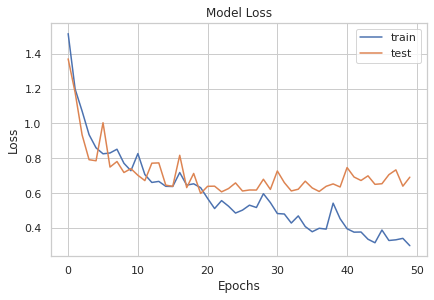

In [ ]:
# Plot loss performance on train and test set:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

We can notice that after after epoch 20, loss function for test data doesn't decrease much compared to train data

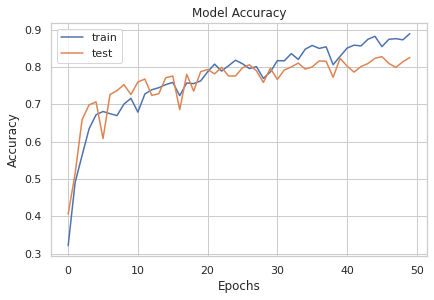

In [ ]:
# Plot accuracy on train and test data:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

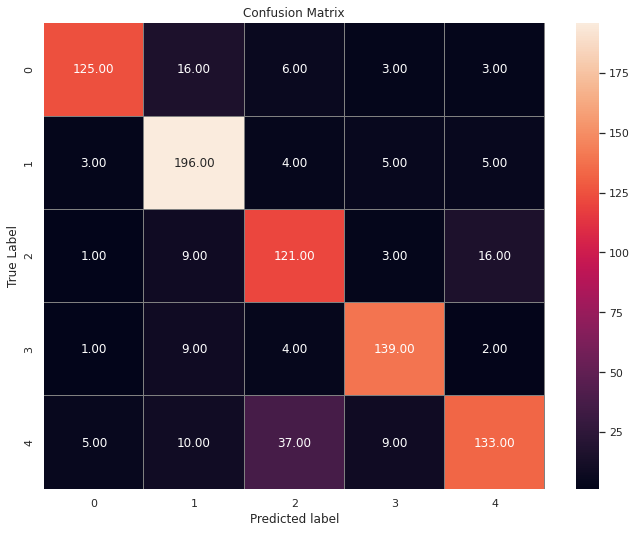

In [ ]:
# Plot confusion matrix:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
y_true = np.argmax(y_test,axis = 1)

confusion_mtx = confusion_matrix(y_true,y_pred_classes)
f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, 
            annot=True, 
            linewidths = 0.01, 
            linecolor = "gray", 
            fmt = ".2f",ax=ax)

plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Overall, our model's accuracy rate exceeded 82% on the test data. I believe this is not a bad result considering how small the original dataset is.

According to the confusion matrix of the most difficult to detect the type of flower is rose, and the easiest flower to detect is sunflower. 

Most false predictions are between roses and tulips.
